In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_PATH = 'data/'
JOB_POSTINGS_PATH = DATA_PATH + 'gsearch_jobs.csv'
COMPANIES_PATH = DATA_PATH + 'companies.csv'
INDUSTRIES_PATH = DATA_PATH + 'industries.csv'
COMPANY_INDUSTRY_PATH = DATA_PATH + 'company_industries.csv'
EMPLOYEE_COUNTS_PATH = DATA_PATH + 'employee_counts.csv'
JOB_LEVEL_VERIFY_PATH = DATA_PATH + 'verify_job_level_extraction.csv'
PROCESSED_DATA_PATH = DATA_PATH + 'dataframe_after_preprocessing.csv'
TFIDF_PATH = DATA_PATH + 'tfidf_mtx.csv'
BERT_PATH = DATA_PATH + 'bert_embeddings.csv'
W2V_PATH = DATA_PATH + 'w2v.csv'

In [3]:
df_merged = pd.read_csv(PROCESSED_DATA_PATH)

In [4]:
df_merged.columns

Index(['description', 'work_from_home', 'salary', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens',
       'company_size', 'Years_of_Experience', 'level_Entry', 'level_Mid',
       'level_Senior', 'level_Unspecified', 'city_Broken Arrow, OK',
       'city_Columbia, MO', 'city_Edmond, OK', 'city_Fayetteville, AR',
       'city_Fort Smith, AR', 'city_Independence, MO', 'city_Kansas City, KS',
       'city_Kansas City, MO', 'city_Lawrence, KS', 'city_Lawton, OK',
       'city_Lee's Summit, MO', 'city_Norman, OK', 'city_Oklahoma City, OK',
       'city_Olathe, KS', 'city_Overland Park, KS', 'city_Rogers, AR',
       'city_Springdale, AR', 'city_Springfield, MO', 'city_Topeka, KS',
       'city_Tulsa, OK', 'city_Wichita, KS', 'city_minor_cities',
       'city_Broken Arrow, OK.1', 'city_Columbia, MO.1', 'city_Edmond, OK.1',
       'city_Fayetteville, AR.1', 'city_Fort Smith, AR.1

### Baseline Linear Regression

In [22]:
for item in eval(df_merged['required_soft_skills'][0]):
    print(item)

collaboration
leadership
innovation
sales
organizational skills
critical thinking


In [27]:
from collections import Counter
all_skills = []
for i in range(len(df_merged)):
    for skill in eval(df_merged['required_soft_skills'][i]):
        all_skills.append(skill)
skill_counts = Counter(all_skills)
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])
skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(skill_counts_df.head(20))


                     Skill  Count
0               management  19951
1                 research  10178
2               operations   8726
3               leadership   8425
4                 planning   5947
5            collaboration   5720
6                    sales   5541
7               innovation   5204
8                  writing   5047
9              integration   4768
10              governance   4268
11       analytical skills   4217
12           presentations   4146
13   written communication   3483
14              consulting   3390
15  information technology   3003
16        microsoft office   2876
17         decision making   2813
18         problem solving   2798
19          infrastructure   2693


In [28]:
# import statsmodels.api as sm 
# x2 = sm.add_constant(df_merged['Years_of_Experience'].fillna(0))
# model = sm.OLS(df_merged['salary_standardized'], x2).fit()
# print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     salary_standardized   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.1351
Date:                 Fri, 08 Nov 2024   Prob (F-statistic):              0.713
Time:                         22:59:54   Log-Likelihood:            -4.5032e+05
No. Observations:                39372   AIC:                         9.006e+05
Df Residuals:                    39370   BIC:                         9.007e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.2

In [6]:
# X = df_merged[['location_0', 'location_1', 'location_2','location_3', 'location_4', 'location_5', 
#                'location_6', 'location_7','commute_time', 'company_size', 'industry_0',
#                'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5',
#                'industry_6', 'Years_of_Experience', 'average_length', 'num_skills']].fillna(0)
# y = df_merged['salary_standardized']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=699)

# import statsmodels.api as sm 
# x2 = sm.add_constant(X_train)
# model = sm.OLS(y_train, x2).fit()
# print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     salary_standardized   R-squared:                       0.081
Model:                             OLS   Adj. R-squared:                  0.081
Method:                  Least Squares   F-statistic:                     145.8
Date:                 Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                         15:02:28   Log-Likelihood:            -3.3874e+05
No. Observations:                29705   AIC:                         6.775e+05
Df Residuals:                    29686   BIC:                         6.777e+05
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
location_0           1.7

In [9]:
# y_pred = model.predict(X_test)

In [10]:
# from sklearn.metrics import accuracy_score, mean_squared_error

# # Calculate MSE (for regression or if needed as a performance metric)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

Mean Squared Error: 463014506.8836307


### Classification Model

Accuracy:  0.9076433121019108
Confusion Matrix: 
 [[624  41]
 [104 801]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.86      0.94      0.90       665
         low       0.95      0.89      0.92       905

    accuracy                           0.91      1570
   macro avg       0.90      0.91      0.91      1570
weighted avg       0.91      0.91      0.91      1570



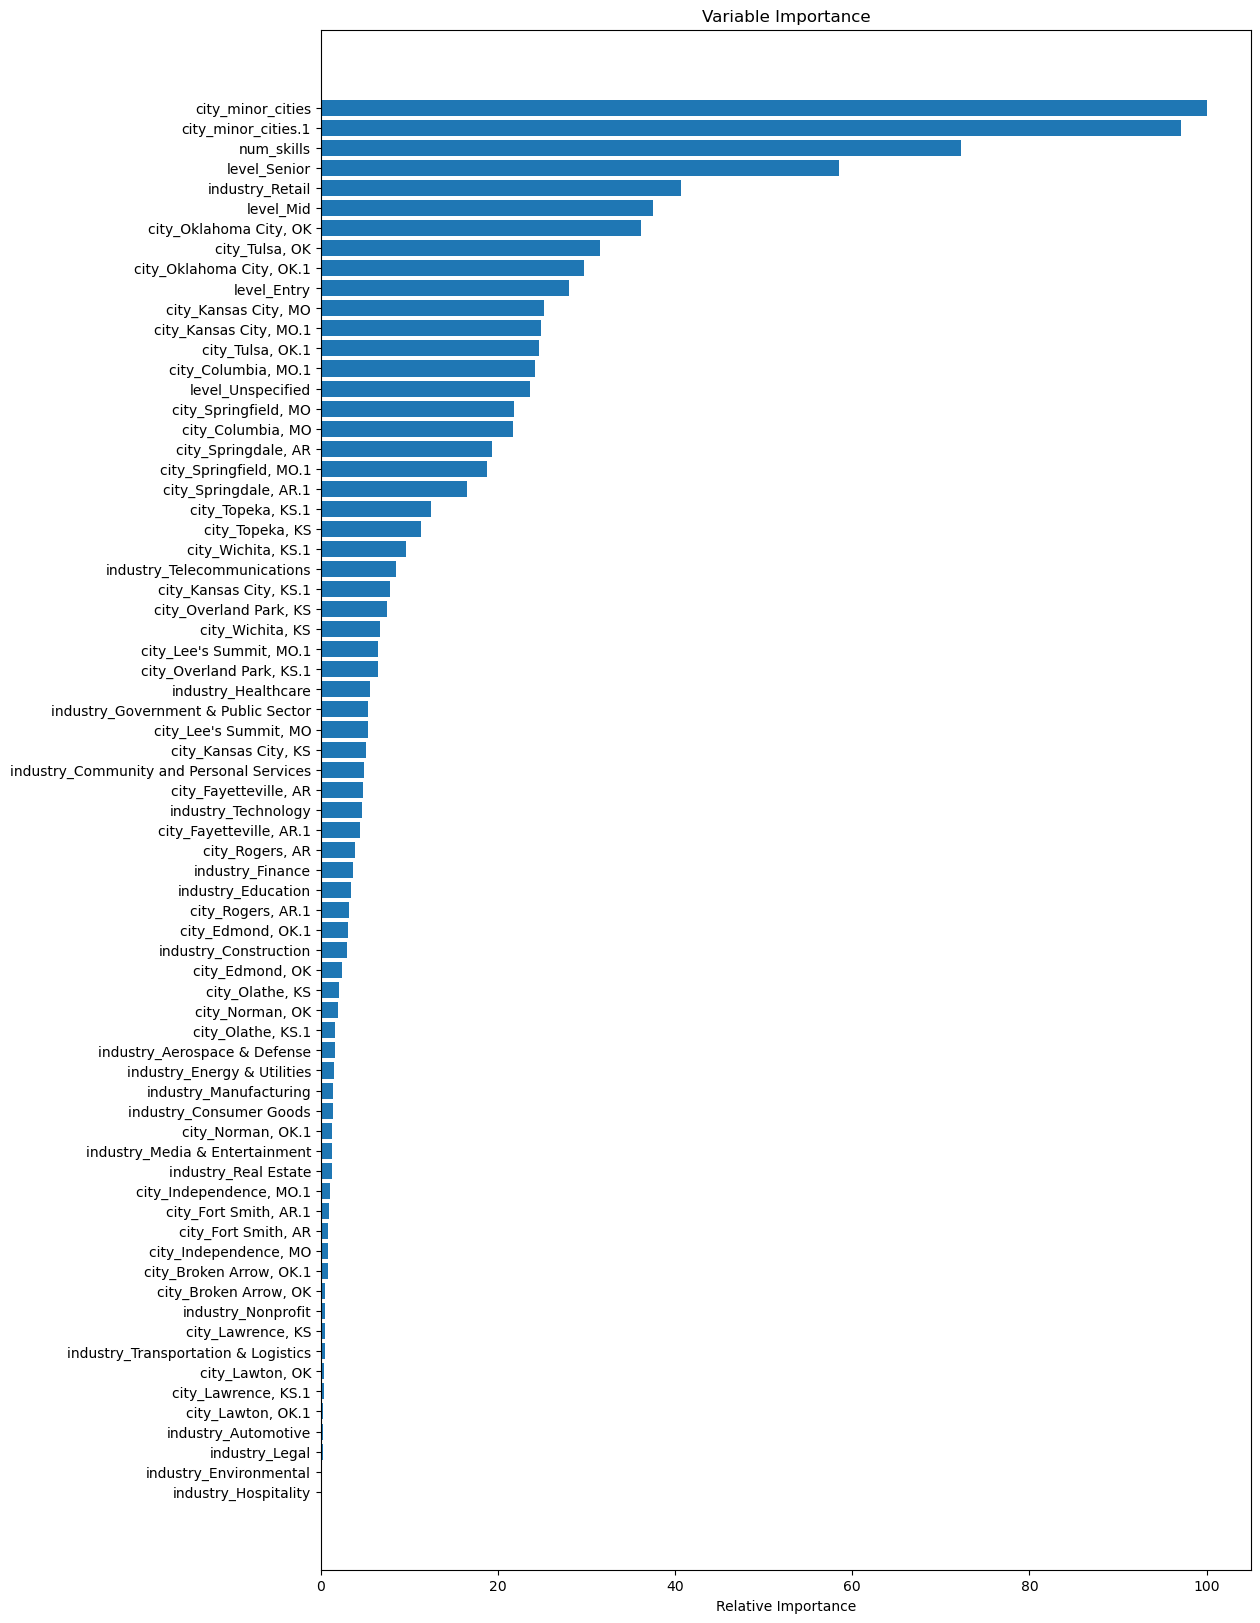

In [5]:
# Categorize salary into high and low according to the median
df_merged['salary_category'] = np.where(df_merged['salary_standardized'] > df_merged['salary_standardized'].median(), 'high', 'low')

# fit the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_merged[['level_Entry', 'level_Mid',
       'level_Senior', 'level_Unspecified', 'city_Broken Arrow, OK',
       'city_Columbia, MO', 'city_Edmond, OK', 'city_Fayetteville, AR',
       'city_Fort Smith, AR', 'city_Independence, MO', 'city_Kansas City, KS',
       'city_Kansas City, MO', 'city_Lawrence, KS', 'city_Lawton, OK',
       "city_Lee's Summit, MO", 'city_Norman, OK', 'city_Oklahoma City, OK',
       'city_Olathe, KS', 'city_Overland Park, KS', 'city_Rogers, AR',
       'city_Springdale, AR', 'city_Springfield, MO', 'city_Topeka, KS',
       'city_Tulsa, OK', 'city_Wichita, KS', 'city_minor_cities',
       'city_Broken Arrow, OK.1', 'city_Columbia, MO.1', 'city_Edmond, OK.1',
       'city_Fayetteville, AR.1', 'city_Fort Smith, AR.1',
       'city_Independence, MO.1', 'city_Kansas City, KS.1',
       'city_Kansas City, MO.1', 'city_Lawrence, KS.1', 'city_Lawton, OK.1',
       "city_Lee's Summit, MO.1", 'city_Norman, OK.1',
       'city_Oklahoma City, OK.1', 'city_Olathe, KS.1',
       'city_Overland Park, KS.1', 'city_Rogers, AR.1',
       'city_Springdale, AR.1', 'city_Springfield, MO.1', 'city_Topeka, KS.1',
       'city_Tulsa, OK.1', 'city_Wichita, KS.1', 'city_minor_cities.1',
       'industry_Aerospace & Defense', 'industry_Automotive',
       'industry_Community and Personal Services', 'industry_Construction',
       'industry_Consumer Goods', 'industry_Education',
       'industry_Energy & Utilities', 'industry_Environmental',
       'industry_Finance', 'industry_Government & Public Sector',
       'industry_Healthcare', 'industry_Hospitality', 'industry_Legal',
       'industry_Manufacturing', 'industry_Media & Entertainment',
       'industry_Nonprofit', 'industry_Real Estate', 'industry_Retail',
       'industry_Technology', 'industry_Telecommunications',
       'industry_Transportation & Logistics', 'num_skills']].fillna(0)
y = df_merged['salary_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# Feature importance
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [6]:
# Try multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = [LogisticRegression(), SVC(), GradientBoostingClassifier(), KNeighborsClassifier(), GaussianNB(), MLPClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Neural Network']
accuracy_list = []

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    print('\n')

Logistic Regression
Accuracy:  0.8687898089171975
Confusion Matrix: 
 [[609  56]
 [150 755]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.80      0.92      0.86       665
         low       0.93      0.83      0.88       905

    accuracy                           0.87      1570
   macro avg       0.87      0.88      0.87      1570
weighted avg       0.88      0.87      0.87      1570



SVM
Accuracy:  0.8777070063694268
Confusion Matrix: 
 [[609  56]
 [136 769]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.82      0.92      0.86       665
         low       0.93      0.85      0.89       905

    accuracy                           0.88      1570
   macro avg       0.87      0.88      0.88      1570
weighted avg       0.88      0.88      0.88      1570



Gradient Boosting
Accuracy:  0.8987261146496816
Confusion Matrix: 
 [[619  46]
 [113 792]]
Classification Report: 
       

### Best Model: Random Forest Classifier

### BERT embeddings

In [7]:
# build a BERT model for job descriptions
from transformers import BertTokenizer, BertModel
import torch
    
if not os.path.exists(BERT_PATH):
    # Load the BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    if torch.cuda.is_available():
        print ('cuda')
    else:
        print('cpu')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    # Tokenize the job descriptions
    batch_size = 16
    embeddings = []
    
    for i in range(0, len(df_merged), batch_size):
        batch_texts = df_merged['description'].tolist()[i:i+batch_size]
        encoded_inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt')
        input_ids = encoded_inputs['input_ids'].to(device)
        attention_mask = encoded_inputs['attention_mask'].to(device)
        
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
            embeddings.append(batch_embeddings)
    
    embeddings = np.vstack(embeddings)
    bert_embeddings_df = pd.DataFrame(embeddings, index=df_merged.index)
    bert_embeddings_df.to_csv(BERT_PATH, index=False)
else:
    bert_embeddings_df = pd.read_csv(BERT_PATH)

In [9]:
import statsmodels.api as sm 
X_combined_bert = pd.concat([X, bert_embeddings_df], axis=1)

X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_combined_bert, y, test_size=0.25, random_state=699)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bert, y_train)

y_pred = clf.predict(X_test_bert)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8318042813455657
Confusion Matrix: 
 [[635 204]
 [126 997]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.83      0.76      0.79       839
         low       0.83      0.89      0.86      1123

    accuracy                           0.83      1962
   macro avg       0.83      0.82      0.83      1962
weighted avg       0.83      0.83      0.83      1962



### Word2Vec embeddings

In [69]:
# df_merged['description_tokens']

In [68]:
# df_merged['description'] = df_merged['description'].apply(lambda x: re.findall(r"'(.*?)'", x))

In [42]:
# from gensim.models import Word2Vec

# vector_size = 100

# all_tokens = [token for sublist in df_merged['description'] for token in sublist]
# w2v_model1 = Word2Vec(sentences=df_merged['description'], vector_size=vector_size, window=5, min_count=1, workers=4)
# w2v_model1.train(df_merged['description'], total_examples=w2v_model1.corpus_count, epochs=10)

(82640218, 367726820)

In [43]:
# wv = w2v_model1.wv
# #After filtering for min frequency, there are 5514 words in the corpus
# words = list(wv.key_to_index)
# print('Vocabulary size:%d' % len(words))

Vocabulary size:165


In [44]:
# wv.most_similar('r')

In [11]:
# Generate Word2Vec embeddings for job descriptions

if not os.path.exists(W2V_PATH):
    from gensim.models import Word2Vec

    vector_size = 100
    
    all_tokens = [token for sublist in df_merged['description'] for token in sublist]
    w2v_model1 = Word2Vec(sentences=df_merged['description'], vector_size=vector_size, window=5, min_count=1, workers=4)
    w2v_model1.train(df_merged['description'], total_examples=w2v_model1.corpus_count, epochs=10)

    wv = w2v_model1.wv
    #After filtering for min frequency, there are 5514 words in the corpus
    words = list(wv.key_to_index)
    print('Vocabulary size:%d' % len(words))

    def get_w2v_embeddings(tokens, model, vector_size=vector_size):
        embeddings = np.zeros(vector_size)
        count = 0
        for token in tokens:
            if token in model.wv:
                embeddings += model.wv[token]
                count += 1
        if count > 0:
            embeddings /= count
        return embeddings
    
    w2v_embeddings = df_merged['description'].apply(lambda x: get_w2v_embeddings(x, w2v_model1))
    
    # Convert the embeddings to a DataFrame
    w2v_embeddings_df = pd.DataFrame(w2v_embeddings.tolist(), index=df_merged.index)
    
    w2v_embeddings_df.to_csv(W2V_PATH, index=False)
else:
    w2v_embeddings_df = pd.read_csv(W2V_PATH)

In [12]:
# Combine the original features with the Word2Vec embeddings
X_combined_w2v = pd.concat([X, w2v_embeddings_df], axis=1)
X_combined_w2v.columns = X_combined_w2v.columns.astype(str)

X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_combined_w2v, y, test_size=0.25, random_state=699)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_w2v, y_train)

y_pred = clf.predict(X_test_w2v)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8873598369011213
Confusion Matrix: 
 [[ 738  101]
 [ 120 1003]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.86      0.88      0.87       839
         low       0.91      0.89      0.90      1123

    accuracy                           0.89      1962
   macro avg       0.88      0.89      0.89      1962
weighted avg       0.89      0.89      0.89      1962



In [13]:
# Random Forest Regressor, support vector machine, and gradient boosting regressor using pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Ensure all column names are strings
X_train_w2v.columns = X_train_w2v.columns.astype(str)
X_test_w2v.columns = X_test_w2v.columns.astype(str)

X_train_w2v, X_test_w2v, y_reg_train, y_reg_test = train_test_split(X_combined_w2v, df_merged['salary_standardized'], test_size=0.25, random_state=699)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=699)
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf_regressor)])
rf_pipeline.fit(X_train_w2v, y_reg_train)
rf_mse = mean_squared_error(y_reg_test, rf_pipeline.predict(X_test_w2v))
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 236251819.06957448


In [14]:
# Support Vector Machine Regressor
svr_regressor = SVR()
svr_pipeline = Pipeline([('scaler', StandardScaler()), ('svr', svr_regressor)])
svr_pipeline.fit(X_train_w2v, y_reg_train)
svr_mse = mean_squared_error(y_reg_test, svr_pipeline.predict(X_test_w2v))
print("SVM MSE:", svr_mse)

SVM MSE: 502091469.72007453


In [15]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=699)
gb_pipeline = Pipeline([('scaler', StandardScaler()), ('gb', gb_regressor)])
gb_pipeline.fit(X_train_w2v, y_reg_train)
gb_mse = mean_squared_error(y_reg_test, gb_pipeline.predict(X_test_w2v))
print("Gradient Boosting MSE:", gb_mse)

Gradient Boosting MSE: 277284122.6395957


Regression task still got pretty poor performance

### Pretrained GloVe Model Embeddings

In [16]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [17]:
# !unzip glove.6B.zip

In [18]:
# # GloVe Model
# from gensim.models import KeyedVectors

# glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False)

# # Generate GloVe embeddings for job descriptions
# glove_embeddings = df_merged['description'].apply(lambda x: get_w2v_embeddings(x, glove_model))

# # Convert the embeddings to a DataFrame
# glove_embeddings_df = pd.DataFrame(glove_embeddings.tolist(), index=df_merged.index)

### TFIDF Feature

In [19]:
tfidf_mtx = pd.read_csv(TFIDF_PATH)

In [20]:
X_combined_tfidf = pd.concat([X, tfidf_mtx], axis=1)
X_combined_tfidf.columns = X_combined_tfidf.columns.astype(str)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.25, random_state=699)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8843017329255861
Confusion Matrix: 
 [[ 708  131]
 [  96 1027]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.88      0.84      0.86       839
         low       0.89      0.91      0.90      1123

    accuracy                           0.88      1962
   macro avg       0.88      0.88      0.88      1962
weighted avg       0.88      0.88      0.88      1962



### Try including both W2V and TFIDF

In [21]:
X_combined_w2v_tfidf = pd.concat([X, w2v_embeddings_df, tfidf_mtx], axis=1)
X_combined_w2v_tfidf.columns = X_combined_w2v_tfidf.columns.astype(str)

X_train_w2v_tfidf, X_test_w2v_tfidf, y_train, y_test = train_test_split(X_combined_w2v_tfidf, y, test_size=0.25, random_state=699)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_w2v_tfidf, y_train)

y_pred = clf.predict(X_test_w2v_tfidf)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8776758409785933
Confusion Matrix: 
 [[ 696  143]
 [  97 1026]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.88      0.83      0.85       839
         low       0.88      0.91      0.90      1123

    accuracy                           0.88      1962
   macro avg       0.88      0.87      0.87      1962
weighted avg       0.88      0.88      0.88      1962



### Multi-Classification

In [22]:
df_merged['salary_multiclass'] = pd.qcut(df_merged['salary_standardized'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [23]:
# Combine the original features with the Word2Vec embeddings
X_combined_w2v = pd.concat([X, w2v_embeddings_df], axis=1)
X_combined_w2v.columns = X_combined_w2v.columns.astype(str)

y_multi = df_merged['salary_multiclass']

X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_combined_w2v, y_multi, test_size=0.25, random_state=699)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_w2v, y_train)

y_pred = clf.predict(X_test_w2v)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8511722731906218
Confusion Matrix: 
 [[302  34   9  21]
 [ 25 429  13  44]
 [ 13  20 559  20]
 [ 29  42  22 380]]
Classification Report: 
               precision    recall  f1-score   support

        High       0.82      0.83      0.82       366
         Low       0.82      0.84      0.83       511
      Medium       0.93      0.91      0.92       612
   Very High       0.82      0.80      0.81       473

    accuracy                           0.85      1962
   macro avg       0.84      0.85      0.85      1962
weighted avg       0.85      0.85      0.85      1962



In [24]:
# Try multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = [LogisticRegression(), SVC(), GradientBoostingClassifier(), KNeighborsClassifier(), GaussianNB(), MLPClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Neural Network']
accuracy_list = []

for model, model_name in zip(models, model_names):
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)
    print(model_name)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    print('\n')

Logistic Regression
Accuracy:  0.7874617737003058
Confusion Matrix: 
 [[266  28  20  52]
 [ 58 346  25  82]
 [ 13  20 544  35]
 [ 44  18  22 389]]
Classification Report: 
               precision    recall  f1-score   support

        High       0.70      0.73      0.71       366
         Low       0.84      0.68      0.75       511
      Medium       0.89      0.89      0.89       612
   Very High       0.70      0.82      0.75       473

    accuracy                           0.79      1962
   macro avg       0.78      0.78      0.78      1962
weighted avg       0.79      0.79      0.79      1962



SVM
Accuracy:  0.7940876656472987
Confusion Matrix: 
 [[256  17   8  85]
 [ 30 337  26 118]
 [ 11   9 555  37]
 [ 25  16  22 410]]
Classification Report: 
               precision    recall  f1-score   support

        High       0.80      0.70      0.74       366
         Low       0.89      0.66      0.76       511
      Medium       0.91      0.91      0.91       612
   Very High      

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x146191e67ec0>
Traceback (most recent call last):
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split

Gradient Boosting
Accuracy:  0.8343527013251784
Confusion Matrix: 
 [[284  39   9  34]
 [ 31 416  18  46]
 [ 11  22 556  23]
 [ 31  44  17 381]]
Classification Report: 
               precision    recall  f1-score   support

        High       0.80      0.78      0.79       366
         Low       0.80      0.81      0.81       511
      Medium       0.93      0.91      0.92       612
   Very High       0.79      0.81      0.80       473

    accuracy                           0.83      1962
   macro avg       0.83      0.83      0.83      1962
weighted avg       0.84      0.83      0.83      1962



KNN
Accuracy:  0.8190621814475025
Confusion Matrix: 
 [[309  23  13  21]
 [ 41 393  33  44]
 [ 18  18 554  22]
 [ 43  52  27 351]]
Classification Report: 
               precision    recall  f1-score   support

        High       0.75      0.84      0.80       366
         Low       0.81      0.77      0.79       511
      Medium       0.88      0.91      0.89       612
   Very High       0